# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 모델링
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, XGBClassifier, plot_tree
from sklearn.metrics import * 

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings(action='ignore')

import scipy.stats as spst
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedKFold, cross_val_score, StratifiedKFold, KFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from datetime import datetime, timedelta

---

# (실습준비) 데이터 불러오기부터

In [2]:
# 학습 데이터 로딩
air_21 = pd.read_csv("air_2021.csv", sep=',', index_col = 0, encoding = 'utf-8' )
air_22 = pd.read_csv("air_2022.csv", sep=',', index_col = 0, encoding = 'utf-8' )

In [3]:
weather_21 = pd.read_csv("weather_2021.csv", sep = ',', encoding='cp949')
weather_22 = pd.read_csv("weather_2022.csv", sep = ',', encoding='cp949')

---

# 1. 이상치/결측치 처리

#### [실습문제1] 미세먼지 데이터 결측치 처리
* 미세먼지 데이터의 결측치를 확인하고 결측치가 존재한다면 처리해주세요.


* 앞서 데이터 불러오기 및 분석 단계에서 확인한 불필요한 변수에 대해 제거 해 주세요. 

In [4]:
# group할 일시 제외 불필요 변수 drop
air_21 = air_21.drop(columns = ['지역', '망', '측정소코드', '측정소명', '주소'])
air_22 = air_22.drop(columns = ['지역', '망', '측정소코드', '측정소명', '주소'])

In [5]:
air_21.head()

,측정일시,SO2,CO,O3,NO2,PM10,PM25
0,2021100101,0.003,0.6,0.002,0.039,31.0,18.0
1,2021100102,0.003,0.6,0.002,0.035,27.0,16.0
2,2021100103,0.003,0.6,0.002,0.033,28.0,18.0
3,2021100104,0.003,0.6,0.002,0.030,26.0,16.0
4,2021100105,0.003,0.5,0.003,0.026,26.0,16.0


In [6]:
air_22.head()

,측정일시,SO2,CO,O3,NO2,PM10,PM25
0,2022010101,0.003,0.4,0.026,0.016,23.0,12.0
1,2022010102,0.003,0.4,0.022,0.020,20.0,9.0
2,2022010103,0.003,0.5,0.014,0.028,20.0,9.0
3,2022010104,0.003,0.5,0.016,0.027,19.0,10.0
4,2022010105,0.003,0.5,0.005,0.040,24.0,11.0


In [7]:
imp = IterativeImputer(estimator=RandomForestRegressor())

In [8]:
imp.fit(air_21)

IterativeImputer(estimator=RandomForestRegressor())

In [9]:
air_21 = pd.DataFrame(imp.transform(air_21), columns = air_21.columns)

In [10]:
air_21.isna().sum()

측정일시    0
SO2     0
CO      0
O3      0
NO2     0
PM10    0
PM25    0
dtype: int64

In [11]:
imp.fit(air_22)

IterativeImputer(estimator=RandomForestRegressor())

In [12]:
air_22 = pd.DataFrame(imp.transform(air_22), columns = air_22.columns)

In [13]:
air_22.isna().sum()

측정일시    0
SO2     0
CO      0
O3      0
NO2     0
PM10    0
PM25    0
dtype: int64

#### [실습문제2] 날씨 데이터 결측치 처리
* 날씨 데이터의 결측치를 확인하고 결측치가 존재한다면 처리해주세요.

* '강우량'을 어떻게 해야할까요?

- 강우량 : 0에 대한 값이 따로 있는 것으로 보아 장비 점검 오류 등으로 인한 미측정 구간으로 예상, 역시 IterativeImputer로 결측치 처리 필요

In [14]:
columns = ['지점', 
           '지점명', 
           '기온 QC플래그',
           '강수량 QC플래그',
           '풍속 QC플래그',
           '풍향 QC플래그',
           '습도 QC플래그',
           '현지기압 QC플래그',
           '해면기압 QC플래그',
           '일조 QC플래그',
           '일사 QC플래그',
           '운형(운형약어)',
           '지면상태(지면상태코드)',
           '현상번호(국내식)',
           '지면온도 QC플래그']

weather_21 = weather_21.drop(columns = columns)
weather_22 = weather_22.drop(columns = columns)

In [15]:
weather_21.head()

,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),...,3시간신적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,2021-01-01 01:00,-8.7,NaN,2.4,270.0,68,2.2,-13.5,1016.4,1027.7,...,NaN,0.0,0,NaN,2000,-6.9,-1.0,-0.8,0.3,1.6
1,2021-01-01 02:00,-9.1,NaN,1.6,270.0,69,2.1,-13.7,1016.2,1027.5,...,NaN,0.0,0,NaN,2000,-7.1,-1.1,-0.8,0.3,1.6
2,2021-01-01 03:00,-9.3,NaN,1.1,250.0,70,2.1,-13.7,1016.8,1028.1,...,NaN,0.0,0,NaN,2000,-7.3,-1.2,-0.9,0.3,1.6
3,2021-01-01 04:00,-9.3,NaN,0.3,0.0,71,2.2,-13.5,1016.2,1027.5,...,NaN,0.0,0,NaN,2000,-7.5,-1.3,-1.0,0.2,1.5
4,2021-01-01 05:00,-9.7,NaN,1.9,20.0,72,2.1,-13.8,1015.6,1026.9,...,NaN,0.0,0,NaN,2000,-7.6,-1.3,-1.0,0.2,1.5


In [16]:
#imp = IterativeImputer(estimator=RandomForestRegressor())

In [17]:
weather_21.interpolate(method = 'linear', inplace = True) 

In [18]:
weather_21 = weather_21.fillna(0)

In [19]:
weather_21

,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),...,3시간신적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,2021-01-01 01:00,-8.7,0.0,2.4,270.0,68,2.2,-13.5,1016.4,1027.7,...,0.0,0.0,0,0.0,2000,-6.9,-1.0,-0.8,0.3,1.6
1,2021-01-01 02:00,-9.1,0.0,1.6,270.0,69,2.1,-13.7,1016.2,1027.5,...,0.0,0.0,0,0.0,2000,-7.1,-1.1,-0.8,0.3,1.6
2,2021-01-01 03:00,-9.3,0.0,1.1,250.0,70,2.1,-13.7,1016.8,1028.1,...,0.0,0.0,0,0.0,2000,-7.3,-1.2,-0.9,0.3,1.6
3,2021-01-01 04:00,-9.3,0.0,0.3,0.0,71,2.2,-13.5,1016.2,1027.5,...,0.0,0.0,0,0.0,2000,-7.5,-1.3,-1.0,0.2,1.5
4,2021-01-01 05:00,-9.7,0.0,1.9,20.0,72,2.1,-13.8,1015.6,1026.9,...,0.0,0.0,0,0.0,2000,-7.6,-1.3,-1.0,0.2,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2021-12-31 19:00,-6.4,0.0,2.2,250.0,34,1.3,-19.7,1021.1,1032.3,...,0.3,0.0,0,10.0,2000,-4.5,-0.5,-0.7,-0.1,1.0
8755,2021-12-31 20:00,-6.3,0.0,4.1,320.0,35,1.3,-19.2,1021.2,1032.4,...,0.3,0.0,0,10.0,2000,-5.3,-0.6,-0.8,-0.1,1.0
8756,2021-12-31 21:00,-6.7,0.0,4.8,320.0,36,1.3,-19.3,1021.2,1032.4,...,0.3,0.0,0,10.0,2000,-5.7,-0.7,-0.8,-0.1,1.0
8757,2021-12-31 22:00,-7.5,0.0,3.0,320.0,37,1.3,-19.7,1021.8,1033.1,...,0.3,0.0,0,10.0,2000,-6.2,-0.8,-0.9,-0.2,1.0


In [20]:
weather_22.interpolate(method = 'linear', inplace = True) 

In [21]:
weather_22 = weather_22.fillna(0)

In [22]:
#imp.fit(weather_22)

In [23]:
#weather_22 = pd.DataFrame(imp.transform(weather_22), columns = weather_22.columns)

In [24]:
weather_22.isna().sum()

일시               0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
풍향(16방위)         0
습도(%)            0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
해면기압(hPa)        0
일조(hr)           0
일사(MJ/m2)        0
적설(cm)           0
3시간신적설(cm)       0
전운량(10분위)        0
중하층운량(10분위)      0
최저운고(100m )      0
시정(10m)          0
지면온도(°C)         0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
dtype: int64

#### [실습문제3] air_21, air_22 의 '측정일시'를 활용하여 'time'변수 생성하기


* air_21, air_22 의 '측정일시'를 활용하여 'time'변수 생성


* time 변수를 datatime으로 데이터 타입 변경하기

In [25]:
air_21['측정일시'] = air_21['측정일시'].astype(str)

In [26]:
air_21

,측정일시,SO2,CO,O3,NO2,PM10,PM25
0,2021100101.0,0.003,0.6,0.002,0.039,31.0,18.0
1,2021100102.0,0.003,0.6,0.002,0.035,27.0,16.0
2,2021100103.0,0.003,0.6,0.002,0.033,28.0,18.0
3,2021100104.0,0.003,0.6,0.002,0.030,26.0,16.0
4,2021100105.0,0.003,0.5,0.003,0.026,26.0,16.0
...,...,...,...,...,...,...,...
8755,2021093020.0,0.003,0.7,0.020,0.036,35.0,24.0
8756,2021093021.0,0.003,0.6,0.016,0.035,34.0,21.0
8757,2021093022.0,0.003,0.6,0.012,0.036,30.0,19.0
8758,2021093023.0,0.003,0.6,0.004,0.042,33.0,19.0


In [27]:
converted_time = air_21['측정일시'].str.slice(stop =-4) + air_21['측정일시'].str.slice(start=-4).map(lambda x: str(int(x[0:2])-1).zfill(2))

In [28]:
air_21['측정일시'] = pd.to_datetime(converted_time, format ='%Y%m%d%H')

In [29]:
air_21

,측정일시,SO2,CO,O3,NO2,PM10,PM25
0,2021-10-01 00:00:00,0.003,0.6,0.002,0.039,31.0,18.0
1,2021-10-01 01:00:00,0.003,0.6,0.002,0.035,27.0,16.0
2,2021-10-01 02:00:00,0.003,0.6,0.002,0.033,28.0,18.0
3,2021-10-01 03:00:00,0.003,0.6,0.002,0.030,26.0,16.0
4,2021-10-01 04:00:00,0.003,0.5,0.003,0.026,26.0,16.0
...,...,...,...,...,...,...,...
8755,2021-09-30 19:00:00,0.003,0.7,0.020,0.036,35.0,24.0
8756,2021-09-30 20:00:00,0.003,0.6,0.016,0.035,34.0,21.0
8757,2021-09-30 21:00:00,0.003,0.6,0.012,0.036,30.0,19.0
8758,2021-09-30 22:00:00,0.003,0.6,0.004,0.042,33.0,19.0


In [30]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
air_22['측정일시'] = air_22['측정일시'].astype(str)
converted_time = air_22['측정일시'].str.slice(stop =-4) + air_22['측정일시'].str.slice(start=-4).map(lambda x: str(int(x[0:2])-1).zfill(2))

In [31]:
air_22['측정일시'] = pd.to_datetime(converted_time, format ='%Y%m%d%H')

In [32]:
air_22

,측정일시,SO2,CO,O3,NO2,PM10,PM25
0,2022-01-01 00:00:00,0.003,0.4,0.026,0.016,23.0,12.0
1,2022-01-01 01:00:00,0.003,0.4,0.022,0.020,20.0,9.0
2,2022-01-01 02:00:00,0.003,0.5,0.014,0.028,20.0,9.0
3,2022-01-01 03:00:00,0.003,0.5,0.016,0.027,19.0,10.0
4,2022-01-01 04:00:00,0.003,0.5,0.005,0.040,24.0,11.0
...,...,...,...,...,...,...,...
2155,2022-03-31 19:00:00,0.002,0.4,0.036,0.017,11.0,8.0
2156,2022-03-31 20:00:00,0.002,0.4,0.032,0.018,10.0,7.0
2157,2022-03-31 21:00:00,0.003,0.3,0.038,0.013,11.0,5.0
2158,2022-03-31 22:00:00,0.003,0.3,0.036,0.015,11.0,5.0


In [33]:
air_21 = air_21.rename(columns = {'측정일시': 'time'})
air_22 = air_22.rename(columns = {'측정일시': 'time'})

#### [실습문제4] weather_21, weather_22 의 '일시'를 활용하여 'time'변수 생성하기


* weather_21, weather_22 의 '측정일시'를 활용하여 'time'변수 생성


* time 변수를 datatime으로 데이터 타입 변경하기

In [34]:
weather_21['time']=weather_21['일시']
weather_21['time']=pd.to_datetime(weather_21['time'])

In [35]:
weather_22['time']=weather_22['일시']
weather_22['time']=pd.to_datetime(weather_22['time'])

In [36]:
weather_21

,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),...,전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),time
0,2021-01-01 01:00,-8.7,0.0,2.4,270.0,68,2.2,-13.5,1016.4,1027.7,...,0.0,0,0.0,2000,-6.9,-1.0,-0.8,0.3,1.6,2021-01-01 01:00:00
1,2021-01-01 02:00,-9.1,0.0,1.6,270.0,69,2.1,-13.7,1016.2,1027.5,...,0.0,0,0.0,2000,-7.1,-1.1,-0.8,0.3,1.6,2021-01-01 02:00:00
2,2021-01-01 03:00,-9.3,0.0,1.1,250.0,70,2.1,-13.7,1016.8,1028.1,...,0.0,0,0.0,2000,-7.3,-1.2,-0.9,0.3,1.6,2021-01-01 03:00:00
3,2021-01-01 04:00,-9.3,0.0,0.3,0.0,71,2.2,-13.5,1016.2,1027.5,...,0.0,0,0.0,2000,-7.5,-1.3,-1.0,0.2,1.5,2021-01-01 04:00:00
4,2021-01-01 05:00,-9.7,0.0,1.9,20.0,72,2.1,-13.8,1015.6,1026.9,...,0.0,0,0.0,2000,-7.6,-1.3,-1.0,0.2,1.5,2021-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2021-12-31 19:00,-6.4,0.0,2.2,250.0,34,1.3,-19.7,1021.1,1032.3,...,0.0,0,10.0,2000,-4.5,-0.5,-0.7,-0.1,1.0,2021-12-31 19:00:00
8755,2021-12-31 20:00,-6.3,0.0,4.1,320.0,35,1.3,-19.2,1021.2,1032.4,...,0.0,0,10.0,2000,-5.3,-0.6,-0.8,-0.1,1.0,2021-12-31 20:00:00
8756,2021-12-31 21:00,-6.7,0.0,4.8,320.0,36,1.3,-19.3,1021.2,1032.4,...,0.0,0,10.0,2000,-5.7,-0.7,-0.8,-0.1,1.0,2021-12-31 21:00:00
8757,2021-12-31 22:00,-7.5,0.0,3.0,320.0,37,1.3,-19.7,1021.8,1033.1,...,0.0,0,10.0,2000,-6.2,-0.8,-0.9,-0.2,1.0,2021-12-31 22:00:00


In [37]:
col1=weather_21.columns[-1:].to_list()
col2=weather_21.columns[:-1].to_list()
new_col=col1+col2
weather_21=weather_21[new_col]

In [38]:
col1=weather_22.columns[-1:].to_list()
col2=weather_22.columns[:-1].to_list()
new_col=col1+col2
weather_22=weather_22[new_col]

In [39]:
weather_21.drop(columns = ['일시'], inplace = True)
weather_22.drop(columns = ['일시'], inplace = True)

---

# 2. 데이터 합치기
* 미세먼지 데이터와 날씨 데이터를 'time' 기준으로 합쳐보겠습니다

#### [실습문제5] 데이터 합치기
* 'df_21','df_22'에 21년도와 22년도의 미세먼지, 날씨 데이터를 합쳐 넣도록 하겠습니다.

#### air 21, 22 시간순으로 정렬

In [40]:
air_21.sort_values(by=['time'], axis=0, inplace=True)
air_22.sort_values(by=['time'], axis=0, inplace=True)

#### train set 병합

In [41]:
df_21 =  pd.merge(air_21, weather_21, how='outer',on='time')

In [42]:
df_21.head()

,time,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),...,3시간신적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,2021-01-01 00:00:00,0.002,0.5,0.022,0.016,24.0,14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-01 01:00:00,0.002,0.6,0.018,0.020,25.0,14.0,-8.7,0.0,2.4,...,0.0,0.0,0.0,0.0,2000.0,-6.9,-1.0,-0.8,0.3,1.6
2,2021-01-01 02:00:00,0.002,0.6,0.013,0.025,27.0,16.0,-9.1,0.0,1.6,...,0.0,0.0,0.0,0.0,2000.0,-7.1,-1.1,-0.8,0.3,1.6
3,2021-01-01 03:00:00,0.003,0.6,0.011,0.027,23.0,13.0,-9.3,0.0,1.1,...,0.0,0.0,0.0,0.0,2000.0,-7.3,-1.2,-0.9,0.3,1.6
4,2021-01-01 04:00:00,0.003,0.6,0.008,0.032,24.0,14.0,-9.3,0.0,0.3,...,0.0,0.0,0.0,0.0,2000.0,-7.5,-1.3,-1.0,0.2,1.5


#### test set 병합

In [43]:
df_22 = pd.merge(air_22, weather_22, how='outer',on='time')

In [44]:
df_22.head()

,time,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),...,3시간신적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,2022-01-01 00:00:00,0.003,0.4,0.026,0.016,23.0,12.0,-8.5,0.0,1.9,...,0.0,0,0,0.0,2000,-7.0,-1.0,-1.0,-0.2,1.0
1,2022-01-01 01:00:00,0.003,0.4,0.022,0.020,20.0,9.0,-9.2,0.0,1.8,...,0.0,0,0,0.0,2000,-7.2,-1.1,-1.1,-0.2,1.0
2,2022-01-01 02:00:00,0.003,0.5,0.014,0.028,20.0,9.0,-9.5,0.0,1.2,...,0.0,0,0,0.0,2000,-7.5,-1.3,-1.2,-0.2,1.0
3,2022-01-01 03:00:00,0.003,0.5,0.016,0.027,19.0,10.0,-9.3,0.0,1.4,...,0.0,0,0,0.0,2000,-7.6,-1.4,-1.2,-0.2,1.0
4,2022-01-01 04:00:00,0.003,0.5,0.005,0.040,24.0,11.0,-9.6,0.0,1.7,...,0.0,0,0,0.0,2000,-7.6,-1.4,-1.3,-0.3,1.0


### nan값 처리

In [45]:
df_21.shape

(8760, 29)

In [46]:
df_22.shape

(2160, 29)

In [47]:
df_21.head()
#df_21.tail()

,time,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),...,3시간신적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,2021-01-01 00:00:00,0.002,0.5,0.022,0.016,24.0,14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-01 01:00:00,0.002,0.6,0.018,0.020,25.0,14.0,-8.7,0.0,2.4,...,0.0,0.0,0.0,0.0,2000.0,-6.9,-1.0,-0.8,0.3,1.6
2,2021-01-01 02:00:00,0.002,0.6,0.013,0.025,27.0,16.0,-9.1,0.0,1.6,...,0.0,0.0,0.0,0.0,2000.0,-7.1,-1.1,-0.8,0.3,1.6
3,2021-01-01 03:00:00,0.003,0.6,0.011,0.027,23.0,13.0,-9.3,0.0,1.1,...,0.0,0.0,0.0,0.0,2000.0,-7.3,-1.2,-0.9,0.3,1.6
4,2021-01-01 04:00:00,0.003,0.6,0.008,0.032,24.0,14.0,-9.3,0.0,0.3,...,0.0,0.0,0.0,0.0,2000.0,-7.5,-1.3,-1.0,0.2,1.5


In [48]:
df_22.head()
#df_22.tail()

,time,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),...,3시간신적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,2022-01-01 00:00:00,0.003,0.4,0.026,0.016,23.0,12.0,-8.5,0.0,1.9,...,0.0,0,0,0.0,2000,-7.0,-1.0,-1.0,-0.2,1.0
1,2022-01-01 01:00:00,0.003,0.4,0.022,0.020,20.0,9.0,-9.2,0.0,1.8,...,0.0,0,0,0.0,2000,-7.2,-1.1,-1.1,-0.2,1.0
2,2022-01-01 02:00:00,0.003,0.5,0.014,0.028,20.0,9.0,-9.5,0.0,1.2,...,0.0,0,0,0.0,2000,-7.5,-1.3,-1.2,-0.2,1.0
3,2022-01-01 03:00:00,0.003,0.5,0.016,0.027,19.0,10.0,-9.3,0.0,1.4,...,0.0,0,0,0.0,2000,-7.6,-1.4,-1.2,-0.2,1.0
4,2022-01-01 04:00:00,0.003,0.5,0.005,0.040,24.0,11.0,-9.6,0.0,1.7,...,0.0,0,0,0.0,2000,-7.6,-1.4,-1.3,-0.3,1.0


In [49]:
df_21.isnull().sum()

time             0
SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
기온(°C)           1
강수량(mm)          1
풍속(m/s)          1
풍향(16방위)         1
습도(%)            1
증기압(hPa)         1
이슬점온도(°C)        1
현지기압(hPa)        1
해면기압(hPa)        1
일조(hr)           1
일사(MJ/m2)        1
적설(cm)           1
3시간신적설(cm)       1
전운량(10분위)        1
중하층운량(10분위)      1
최저운고(100m )      1
시정(10m)          1
지면온도(°C)         1
5cm 지중온도(°C)     1
10cm 지중온도(°C)    1
20cm 지중온도(°C)    1
30cm 지중온도(°C)    1
dtype: int64

In [50]:
df_22.isnull().sum()

time             0
SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
풍향(16방위)         0
습도(%)            0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
해면기압(hPa)        0
일조(hr)           0
일사(MJ/m2)        0
적설(cm)           0
3시간신적설(cm)       0
전운량(10분위)        0
중하층운량(10분위)      0
최저운고(100m )      0
시정(10m)          0
지면온도(°C)         0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
dtype: int64

In [51]:
# 결측치 바로 뒤의 값으로 채우기
df_21.fillna(method = 'bfill', inplace = True)

In [52]:
df_21.head()

,time,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),...,3시간신적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,2021-01-01 00:00:00,0.002,0.5,0.022,0.016,24.0,14.0,-8.7,0.0,2.4,...,0.0,0.0,0.0,0.0,2000.0,-6.9,-1.0,-0.8,0.3,1.6
1,2021-01-01 01:00:00,0.002,0.6,0.018,0.020,25.0,14.0,-8.7,0.0,2.4,...,0.0,0.0,0.0,0.0,2000.0,-6.9,-1.0,-0.8,0.3,1.6
2,2021-01-01 02:00:00,0.002,0.6,0.013,0.025,27.0,16.0,-9.1,0.0,1.6,...,0.0,0.0,0.0,0.0,2000.0,-7.1,-1.1,-0.8,0.3,1.6
3,2021-01-01 03:00:00,0.003,0.6,0.011,0.027,23.0,13.0,-9.3,0.0,1.1,...,0.0,0.0,0.0,0.0,2000.0,-7.3,-1.2,-0.9,0.3,1.6
4,2021-01-01 04:00:00,0.003,0.6,0.008,0.032,24.0,14.0,-9.3,0.0,0.3,...,0.0,0.0,0.0,0.0,2000.0,-7.5,-1.3,-1.0,0.2,1.5


In [53]:
df_22.interpolate(method = 'linear', inplace = True)

In [54]:
df_22.head()

,time,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),...,3시간신적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,2022-01-01 00:00:00,0.003,0.4,0.026,0.016,23.0,12.0,-8.5,0.0,1.9,...,0.0,0,0,0.0,2000,-7.0,-1.0,-1.0,-0.2,1.0
1,2022-01-01 01:00:00,0.003,0.4,0.022,0.020,20.0,9.0,-9.2,0.0,1.8,...,0.0,0,0,0.0,2000,-7.2,-1.1,-1.1,-0.2,1.0
2,2022-01-01 02:00:00,0.003,0.5,0.014,0.028,20.0,9.0,-9.5,0.0,1.2,...,0.0,0,0,0.0,2000,-7.5,-1.3,-1.2,-0.2,1.0
3,2022-01-01 03:00:00,0.003,0.5,0.016,0.027,19.0,10.0,-9.3,0.0,1.4,...,0.0,0,0,0.0,2000,-7.6,-1.4,-1.2,-0.2,1.0
4,2022-01-01 04:00:00,0.003,0.5,0.005,0.040,24.0,11.0,-9.6,0.0,1.7,...,0.0,0,0,0.0,2000,-7.6,-1.4,-1.3,-0.3,1.0


#### [실습문제7] 미세먼지 농도 다음시점 데이터 생성

* t+1 시점 데이터 생성 (df_21)

In [55]:
# 아래에 실습코드를 작성하고 결과를 확인합니다

df_21['y'] = df_21['PM10'].shift(-1)
display(df_21.head())
display(df_21.tail())

,time,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),...,전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),y
0,2021-01-01 00:00:00,0.002,0.5,0.022,0.016,24.0,14.0,-8.7,0.0,2.4,...,0.0,0.0,0.0,2000.0,-6.9,-1.0,-0.8,0.3,1.6,25.0
1,2021-01-01 01:00:00,0.002,0.6,0.018,0.020,25.0,14.0,-8.7,0.0,2.4,...,0.0,0.0,0.0,2000.0,-6.9,-1.0,-0.8,0.3,1.6,27.0
2,2021-01-01 02:00:00,0.002,0.6,0.013,0.025,27.0,16.0,-9.1,0.0,1.6,...,0.0,0.0,0.0,2000.0,-7.1,-1.1,-0.8,0.3,1.6,23.0
3,2021-01-01 03:00:00,0.003,0.6,0.011,0.027,23.0,13.0,-9.3,0.0,1.1,...,0.0,0.0,0.0,2000.0,-7.3,-1.2,-0.9,0.3,1.6,24.0
4,2021-01-01 04:00:00,0.003,0.6,0.008,0.032,24.0,14.0,-9.3,0.0,0.3,...,0.0,0.0,0.0,2000.0,-7.5,-1.3,-1.0,0.2,1.5,26.0


,time,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),...,전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),y
8755,2021-12-31 19:00:00,0.003,0.4,0.025,0.020,26.0,8.0,-6.4,0.0,2.2,...,0.0,0.0,10.0,2000.0,-4.5,-0.5,-0.7,-0.1,1.0,27.0
8756,2021-12-31 20:00:00,0.003,0.4,0.030,0.014,27.0,9.0,-6.3,0.0,4.1,...,0.0,0.0,10.0,2000.0,-5.3,-0.6,-0.8,-0.1,1.0,20.0
8757,2021-12-31 21:00:00,0.003,0.4,0.033,0.011,20.0,8.0,-6.7,0.0,4.8,...,0.0,0.0,10.0,2000.0,-5.7,-0.7,-0.8,-0.1,1.0,20.0
8758,2021-12-31 22:00:00,0.003,0.4,0.029,0.015,20.0,9.0,-7.5,0.0,3.0,...,0.0,0.0,10.0,2000.0,-6.2,-0.8,-0.9,-0.2,1.0,20.0
8759,2021-12-31 23:00:00,0.003,0.4,0.026,0.016,20.0,9.0,-7.7,0.0,2.9,...,0.0,0.0,10.0,2000.0,-6.5,-0.9,-0.9,-0.2,1.0,NaN


In [56]:
# y에 결측치가 있는 맨 마지막 행 제거
df_21.dropna(axis=0, inplace=True)

In [57]:
df_21.tail()

,time,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),...,전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),y
8754,2021-12-31 18:00:00,0.003,0.4,0.026,0.019,25.0,10.0,-5.9,0.0,2.2,...,0.0,0.0,10.0,2000.0,-3.4,-0.3,-0.6,-0.1,1.0,26.0
8755,2021-12-31 19:00:00,0.003,0.4,0.025,0.020,26.0,8.0,-6.4,0.0,2.2,...,0.0,0.0,10.0,2000.0,-4.5,-0.5,-0.7,-0.1,1.0,27.0
8756,2021-12-31 20:00:00,0.003,0.4,0.030,0.014,27.0,9.0,-6.3,0.0,4.1,...,0.0,0.0,10.0,2000.0,-5.3,-0.6,-0.8,-0.1,1.0,20.0
8757,2021-12-31 21:00:00,0.003,0.4,0.033,0.011,20.0,8.0,-6.7,0.0,4.8,...,0.0,0.0,10.0,2000.0,-5.7,-0.7,-0.8,-0.1,1.0,20.0
8758,2021-12-31 22:00:00,0.003,0.4,0.029,0.015,20.0,9.0,-7.5,0.0,3.0,...,0.0,0.0,10.0,2000.0,-6.2,-0.8,-0.9,-0.2,1.0,20.0


In [58]:
# time 열 제거
df_21.drop('time', axis = 1, inplace = True)
df_21.head()

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),...,전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),y
0,0.002,0.5,0.022,0.016,24.0,14.0,-8.7,0.0,2.4,270.0,...,0.0,0.0,0.0,2000.0,-6.9,-1.0,-0.8,0.3,1.6,25.0
1,0.002,0.6,0.018,0.020,25.0,14.0,-8.7,0.0,2.4,270.0,...,0.0,0.0,0.0,2000.0,-6.9,-1.0,-0.8,0.3,1.6,27.0
2,0.002,0.6,0.013,0.025,27.0,16.0,-9.1,0.0,1.6,270.0,...,0.0,0.0,0.0,2000.0,-7.1,-1.1,-0.8,0.3,1.6,23.0
3,0.003,0.6,0.011,0.027,23.0,13.0,-9.3,0.0,1.1,250.0,...,0.0,0.0,0.0,2000.0,-7.3,-1.2,-0.9,0.3,1.6,24.0
4,0.003,0.6,0.008,0.032,24.0,14.0,-9.3,0.0,0.3,0.0,...,0.0,0.0,0.0,2000.0,-7.5,-1.3,-1.0,0.2,1.5,26.0


#### [실습문제7] 미세먼지 농도 다음시점 데이터 생성

* t+1 시점 데이터 생성(df_22)

In [59]:
df_22['y'] = df_22['PM10'].shift(-1)
display(df_22.head())
display(df_22.tail())

,time,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),...,전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),y
0,2022-01-01 00:00:00,0.003,0.4,0.026,0.016,23.0,12.0,-8.5,0.0,1.9,...,0,0,0.0,2000,-7.0,-1.0,-1.0,-0.2,1.0,20.0
1,2022-01-01 01:00:00,0.003,0.4,0.022,0.020,20.0,9.0,-9.2,0.0,1.8,...,0,0,0.0,2000,-7.2,-1.1,-1.1,-0.2,1.0,20.0
2,2022-01-01 02:00:00,0.003,0.5,0.014,0.028,20.0,9.0,-9.5,0.0,1.2,...,0,0,0.0,2000,-7.5,-1.3,-1.2,-0.2,1.0,19.0
3,2022-01-01 03:00:00,0.003,0.5,0.016,0.027,19.0,10.0,-9.3,0.0,1.4,...,0,0,0.0,2000,-7.6,-1.4,-1.2,-0.2,1.0,24.0
4,2022-01-01 04:00:00,0.003,0.5,0.005,0.040,24.0,11.0,-9.6,0.0,1.7,...,0,0,0.0,2000,-7.6,-1.4,-1.3,-0.3,1.0,19.0


,time,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),...,전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),y
2155,2022-03-31 19:00:00,0.002,0.4,0.036,0.017,11.0,8.0,12.3,0.0,2.9,...,6,1,9.0,2000,10.0,12.6,11.8,11.0,10.2,10.0
2156,2022-03-31 20:00:00,0.002,0.4,0.032,0.018,10.0,7.0,11.6,0.0,2.7,...,6,0,9.5,2000,8.9,12.2,11.6,11.0,10.3,11.0
2157,2022-03-31 21:00:00,0.003,0.3,0.038,0.013,11.0,5.0,10.5,0.0,3.5,...,1,1,10.0,2000,7.8,11.8,11.4,11.0,10.4,11.0
2158,2022-03-31 22:00:00,0.003,0.3,0.036,0.015,11.0,5.0,9.3,0.0,1.9,...,3,3,10.0,2000,7.3,11.4,11.1,10.9,10.5,9.0
2159,2022-03-31 23:00:00,0.002,0.4,0.033,0.017,9.0,5.0,8.4,0.0,1.2,...,1,1,10.0,2000,6.7,11.0,10.8,10.8,10.5,NaN


In [60]:
# y에 결측치가 있는 맨 마지막 행 제거
df_22.dropna(axis=0, inplace=True)

In [61]:
df_22.tail()

,time,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),...,전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),y
2154,2022-03-31 18:00:00,0.002,0.4,0.044,0.010,10.0,9.0,13.2,0.0,4.3,...,9,0,12.5,2000,12.4,12.9,12.0,10.8,10.1,11.0
2155,2022-03-31 19:00:00,0.002,0.4,0.036,0.017,11.0,8.0,12.3,0.0,2.9,...,6,1,9.0,2000,10.0,12.6,11.8,11.0,10.2,10.0
2156,2022-03-31 20:00:00,0.002,0.4,0.032,0.018,10.0,7.0,11.6,0.0,2.7,...,6,0,9.5,2000,8.9,12.2,11.6,11.0,10.3,11.0
2157,2022-03-31 21:00:00,0.003,0.3,0.038,0.013,11.0,5.0,10.5,0.0,3.5,...,1,1,10.0,2000,7.8,11.8,11.4,11.0,10.4,11.0
2158,2022-03-31 22:00:00,0.003,0.3,0.036,0.015,11.0,5.0,9.3,0.0,1.9,...,3,3,10.0,2000,7.3,11.4,11.1,10.9,10.5,9.0


In [62]:
# time 열 제거
df_22.drop('time', axis = 1, inplace = True)
df_22.head()

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),...,전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),y
0,0.003,0.4,0.026,0.016,23.0,12.0,-8.5,0.0,1.9,320,...,0,0,0.0,2000,-7.0,-1.0,-1.0,-0.2,1.0,20.0
1,0.003,0.4,0.022,0.020,20.0,9.0,-9.2,0.0,1.8,270,...,0,0,0.0,2000,-7.2,-1.1,-1.1,-0.2,1.0,20.0
2,0.003,0.5,0.014,0.028,20.0,9.0,-9.5,0.0,1.2,270,...,0,0,0.0,2000,-7.5,-1.3,-1.2,-0.2,1.0,19.0
3,0.003,0.5,0.016,0.027,19.0,10.0,-9.3,0.0,1.4,290,...,0,0,0.0,2000,-7.6,-1.4,-1.2,-0.2,1.0,24.0
4,0.003,0.5,0.005,0.040,24.0,11.0,-9.6,0.0,1.7,340,...,0,0,0.0,2000,-7.6,-1.4,-1.3,-0.3,1.0,19.0


In [63]:
# # PM10 제거
# df_21.drop('PM10', axis = 1, inplace = True)
# df_21.head()

In [64]:
# # PM10 제거
# df_22.drop('PM10', axis = 1, inplace = True)
# df_22.head()

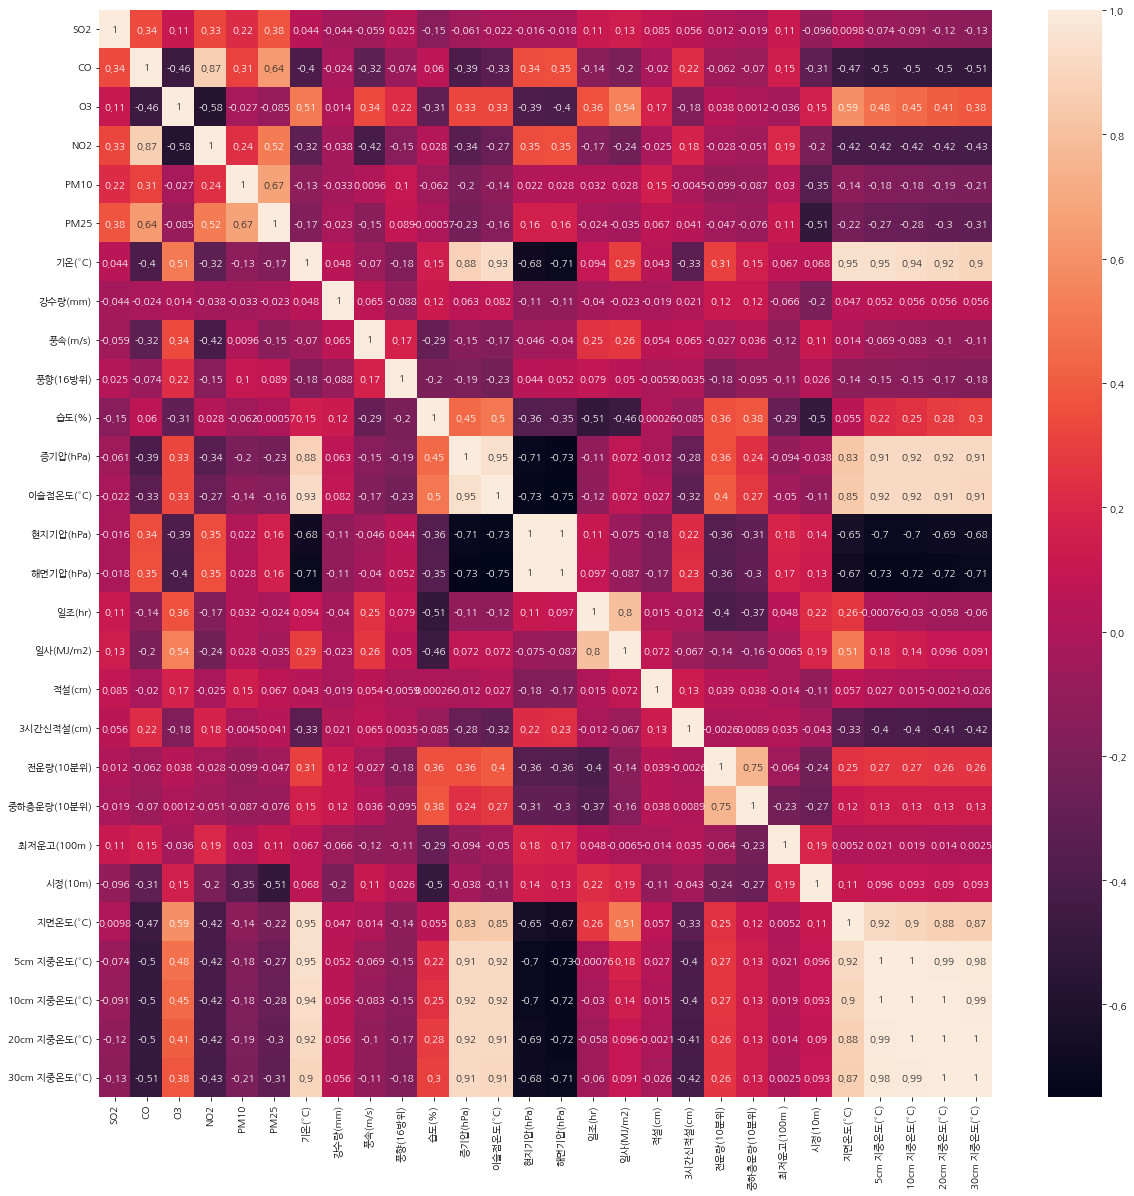

In [65]:
columns = ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25','기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)',
           '증기압(hPa)', '이슬점온도(°C)','현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)',
           '적설(cm)', '3시간신적설(cm)', '전운량(10분위)', '중하층운량(10분위)','최저운고(100m )', '시정(10m)',
           '지면온도(°C)','5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)']
plt.figure(figsize = (20, 20))
sns.heatmap(df_21[columns].corr(), annot = True)
plt.show()

---

# 3. train / test split

#### [실습문제7] 데이터셋 나누기 

* 데이터셋을 train(21년도 데이터), test(22년도 데이터)로 나눠 csv로 저장하도록 하겠습니다.


* train_x / train_y / test_x / test_y 로 나누세요.


* train_x.csv / train_y.csv / test_x.csv / test_y.csv 로 저장하세요.

In [66]:
df_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8759 entries, 0 to 8758
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SO2            8759 non-null   float64
 1   CO             8759 non-null   float64
 2   O3             8759 non-null   float64
 3   NO2            8759 non-null   float64
 4   PM10           8759 non-null   float64
 5   PM25           8759 non-null   float64
 6   기온(°C)         8759 non-null   float64
 7   강수량(mm)        8759 non-null   float64
 8   풍속(m/s)        8759 non-null   float64
 9   풍향(16방위)       8759 non-null   float64
 10  습도(%)          8759 non-null   float64
 11  증기압(hPa)       8759 non-null   float64
 12  이슬점온도(°C)      8759 non-null   float64
 13  현지기압(hPa)      8759 non-null   float64
 14  해면기압(hPa)      8759 non-null   float64
 15  일조(hr)         8759 non-null   float64
 16  일사(MJ/m2)      8759 non-null   float64
 17  적설(cm)         8759 non-null   float64
 18  3시간신적설(c

In [67]:
df_21['y']=df_21['y'].astype(int)

In [68]:
df_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8759 entries, 0 to 8758
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SO2            8759 non-null   float64
 1   CO             8759 non-null   float64
 2   O3             8759 non-null   float64
 3   NO2            8759 non-null   float64
 4   PM10           8759 non-null   float64
 5   PM25           8759 non-null   float64
 6   기온(°C)         8759 non-null   float64
 7   강수량(mm)        8759 non-null   float64
 8   풍속(m/s)        8759 non-null   float64
 9   풍향(16방위)       8759 non-null   float64
 10  습도(%)          8759 non-null   float64
 11  증기압(hPa)       8759 non-null   float64
 12  이슬점온도(°C)      8759 non-null   float64
 13  현지기압(hPa)      8759 non-null   float64
 14  해면기압(hPa)      8759 non-null   float64
 15  일조(hr)         8759 non-null   float64
 16  일사(MJ/m2)      8759 non-null   float64
 17  적설(cm)         8759 non-null   float64
 18  3시간신적설(c

In [69]:
df_22['y']=df_22['y'].astype(int)
df_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SO2            2159 non-null   float64
 1   CO             2159 non-null   float64
 2   O3             2159 non-null   float64
 3   NO2            2159 non-null   float64
 4   PM10           2159 non-null   float64
 5   PM25           2159 non-null   float64
 6   기온(°C)         2159 non-null   float64
 7   강수량(mm)        2159 non-null   float64
 8   풍속(m/s)        2159 non-null   float64
 9   풍향(16방위)       2159 non-null   int64  
 10  습도(%)          2159 non-null   int64  
 11  증기압(hPa)       2159 non-null   float64
 12  이슬점온도(°C)      2159 non-null   float64
 13  현지기압(hPa)      2159 non-null   float64
 14  해면기압(hPa)      2159 non-null   float64
 15  일조(hr)         2159 non-null   float64
 16  일사(MJ/m2)      2159 non-null   float64
 17  적설(cm)         2159 non-null   float64
 18  3시간신적설(c

In [70]:
target = 'y'

xx = df_21.drop(target, axis = 1)
yy = df_21.loc[:, target]

In [71]:
x_train, x_val, y_train, y_val = train_test_split(xx, yy, test_size = 10, shuffle = False)

In [72]:
x_test = df_22.drop(target, axis=1)
y_test = df_22.loc[:, target]

In [73]:
display(x_test.shape, y_test.shape)

(2159, 28)

(2159,)

##### 1) SVC

In [74]:
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

In [75]:
m1 = SVC()
m1.fit(x_train_s, y_train)

SVC()

In [77]:
p1_v = m1.predict(x_val_s)
print('RMSE : ',mean_squared_error(y_val, p1_v, squared = False))
print('MAE : ',mean_absolute_error(y_val, p1_v))
print('MAPE : ',mean_absolute_percentage_error(y_val, p1_v))
print('1-MAPE : ',1-mean_absolute_percentage_error(y_val, p1_v))
print('r2_score : ',r2_score(y_val, p1_v))

RMSE :  4.806245936279167
MAE :  4.3
MAPE :  0.18227638900052695
1-MAPE :  0.817723610999473
r2_score :  -1.434141201264489


In [78]:
cost_t = [0.1, 1, 2, 5,10,20]
acc1_t = []

for c in cost_t :
    m1_1t = SVC(C = c)
    m1_1t.fit(x_train_s, y_train)
    p1_1t = m1_1t.predict(x_test)
    acc1_t.append(accuracy_score(y_test, p1_1t))

In [79]:
gamma_t = np.linspace(0.01, 1, 20)
acc2_t = []

for g in gamma_t :
    m1_1t = SVC(gamma = g, C = 1)
    m1_1t.fit(x_train_s, y_train)
    p1_1t = m1_1t.predict(x_test)
    acc2_t.append(accuracy_score(y_test, p1_1t))

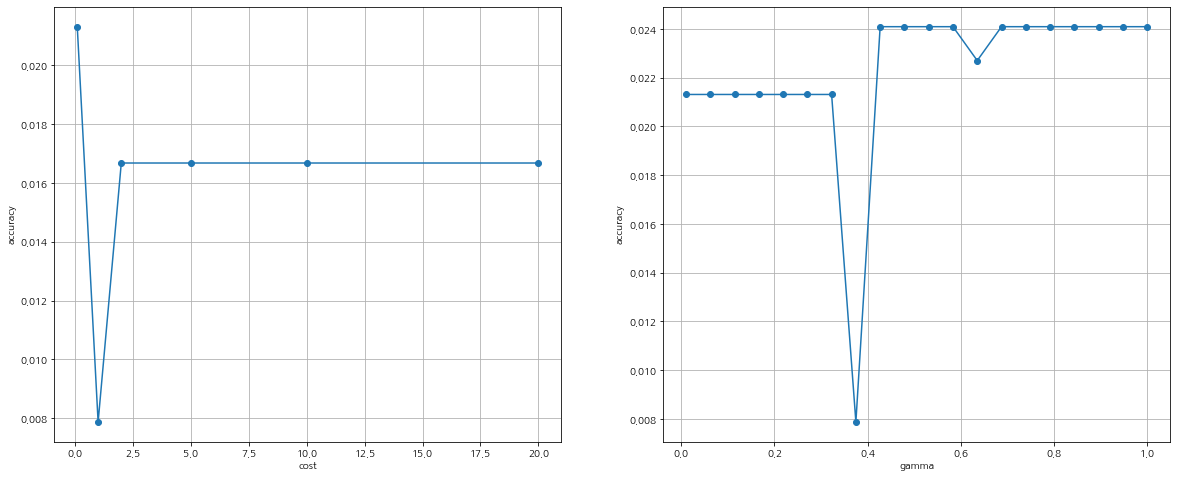

In [80]:
plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
plt.plot(cost_t, acc1_t, marker = 'o')
plt.xlabel('cost')
plt.ylabel('accuracy')
plt.grid()

plt.subplot(1,2,2)
plt.plot(gamma_t, acc2_t, marker = 'o')
plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.grid()

In [81]:
print('RMSE : ',mean_squared_error(y_test, p1_1t, squared = False))
print('MAE : ',mean_absolute_error(y_test, p1_1t))
print('MAPE : ',mean_absolute_percentage_error(y_test, p1_1t))
print('1-MAPE : ',1-mean_absolute_percentage_error(y_test, p1_1t))
print('r2_score : ',r2_score(y_test, p1_1t))

RMSE :  24.073109273378122
MAE :  16.410375173691524
MAPE :  0.6524769634547336
1-MAPE :  0.3475230365452664
r2_score :  -0.04233126479202398


In [82]:
cost = [0.1, 1, 2, 5,10,20]
acc1 = []

for c in cost :
    m1_1v = SVC(C = c)
    m1_1v.fit(x_train_s, y_train)
    p1_1v = m1_1v.predict(x_val_s)
    acc1.append(accuracy_score(y_val, p1_1v))

In [83]:
gamma = np.linspace(0.01, 1, 20)
acc2 = []

for g in gamma :
    m1_1v = SVC(gamma = g, C = 1)
    m1_1v.fit(x_train_s, y_train)
    p1_1v = m1_1v.predict(x_val_s)
    acc2.append(accuracy_score(y_val, p1_1v))

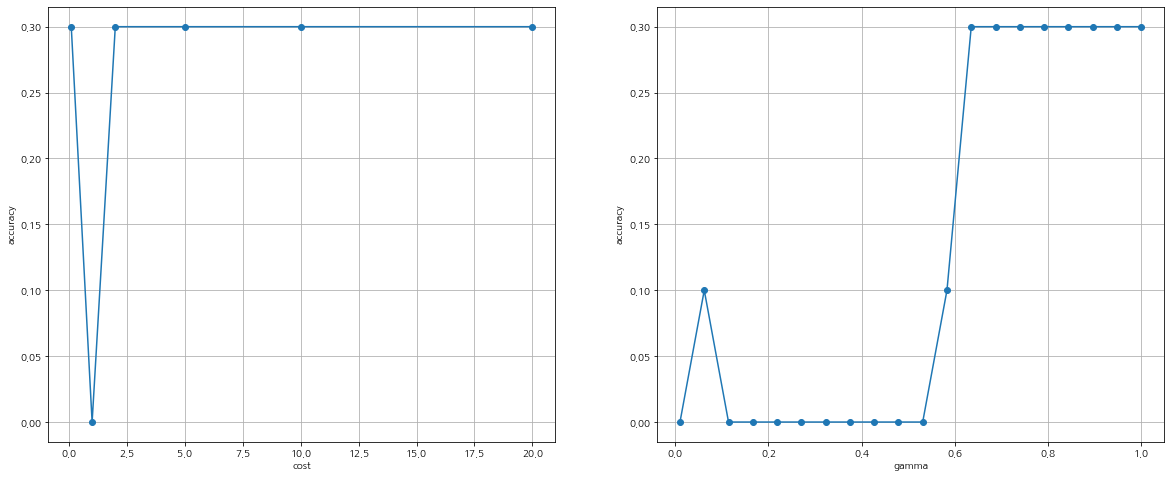

In [84]:
plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
plt.plot(cost, acc1, marker = 'o')
plt.xlabel('cost')
plt.ylabel('accuracy')
plt.grid()

plt.subplot(1,2,2)
plt.plot(gamma, acc2, marker = 'o')
plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.grid()

In [85]:
print('RMSE : ',mean_squared_error(y_val, p1_1v, squared = False))
print('MAE : ',mean_absolute_error(y_val, p1_1v))
print('MAPE : ',mean_absolute_percentage_error(y_val, p1_1v))
print('1-MAPE : ',1-mean_absolute_percentage_error(y_val, p1_1v))
print('r2_score : ',r2_score(y_val, p1_v))

RMSE :  4.47213595499958
MAE :  3.4
MAPE :  0.1288652796756245
1-MAPE :  0.8711347203243756
r2_score :  -1.434141201264489


=> SVC는 r2_score 의 값이 마이너스가 나옴. => 버려야 하는 모델..

##### 1-2) SVR

In [86]:
params1 = {'C' : np.linspace(0.01, 100, 50), 'gamma':[0.001,0.01,.1,1]}
params1

{'C': array([1.00000000e-02, 2.05061224e+00, 4.09122449e+00, 6.13183673e+00,
        8.17244898e+00, 1.02130612e+01, 1.22536735e+01, 1.42942857e+01,
        1.63348980e+01, 1.83755102e+01, 2.04161224e+01, 2.24567347e+01,
        2.44973469e+01, 2.65379592e+01, 2.85785714e+01, 3.06191837e+01,
        3.26597959e+01, 3.47004082e+01, 3.67410204e+01, 3.87816327e+01,
        4.08222449e+01, 4.28628571e+01, 4.49034694e+01, 4.69440816e+01,
        4.89846939e+01, 5.10253061e+01, 5.30659184e+01, 5.51065306e+01,
        5.71471429e+01, 5.91877551e+01, 6.12283673e+01, 6.32689796e+01,
        6.53095918e+01, 6.73502041e+01, 6.93908163e+01, 7.14314286e+01,
        7.34720408e+01, 7.55126531e+01, 7.75532653e+01, 7.95938776e+01,
        8.16344898e+01, 8.36751020e+01, 8.57157143e+01, 8.77563265e+01,
        8.97969388e+01, 9.18375510e+01, 9.38781633e+01, 9.59187755e+01,
        9.79593878e+01, 1.00000000e+02]),
 'gamma': [0.001, 0.01, 0.1, 1]}

In [87]:
m1_2 = SVR()
svm_m1_2 = GridSearchCV(m1_2, params1, cv=5)

In [88]:
svm_m1_2.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': array([1.00000000e-02, 2.05061224e+00, 4.09122449e+00, 6.13183673e+00,
       8.17244898e+00, 1.02130612e+01, 1.22536735e+01, 1.42942857e+01,
       1.63348980e+01, 1.83755102e+01, 2.04161224e+01, 2.24567347e+01,
       2.44973469e+01, 2.65379592e+01, 2.85785714e+01, 3.06191837e+01,
       3.26597959e+01, 3.47004082e+01, 3.67410204e+01, 3.878163...
       5.71471429e+01, 5.91877551e+01, 6.12283673e+01, 6.32689796e+01,
       6.53095918e+01, 6.73502041e+01, 6.93908163e+01, 7.14314286e+01,
       7.34720408e+01, 7.55126531e+01, 7.75532653e+01, 7.95938776e+01,
       8.16344898e+01, 8.36751020e+01, 8.57157143e+01, 8.77563265e+01,
       8.97969388e+01, 9.18375510e+01, 9.38781633e+01, 9.59187755e+01,
       9.79593878e+01, 1.00000000e+02]),
                         'gamma': [0.001, 0.01, 0.1, 1]})

In [89]:
# 최적의 파라미터
svm_m1_2.best_params_

{'C': 100.0, 'gamma': 0.1}

In [90]:
# 그때의 성능
svm_m1_2.best_score_

0.8481020416710272

In [92]:
p1_22 = svm_m1_2.predict(x_val_s)
print('RMSE : ', mean_squared_error(y_val, p1_22, squared=False))
print('MAE  : ', mean_absolute_error(y_val, p1_22))
print('MAPE : ', mean_absolute_percentage_error(y_val, p1_22))
print('1-MAPE : ',1-mean_absolute_percentage_error(y_val, p1_22))
print('r2_score : ',r2_score(y_val, p1_22))

RMSE :  2.5196612843284845
MAE  :  1.997692041622011
MAPE :  0.08333933040450844
1-MAPE :  0.9166606695954915
r2_score :  0.33101233005860187


In [93]:
result1 = pd.DataFrame(svm_m1_2.cv_results_)
temp1 = result1.loc[:, ['param_C','param_gamma','mean_test_score']]
temp1['param_gamma'] = temp1['param_gamma'].astype('str')
temp1.head()

,param_C,param_gamma,mean_test_score
0,0.01,0.001,-0.541683
1,0.01,0.01,-0.517234
2,0.01,0.1,-0.402465
3,0.01,1,-0.373828
4,2.050612,0.001,-0.271835


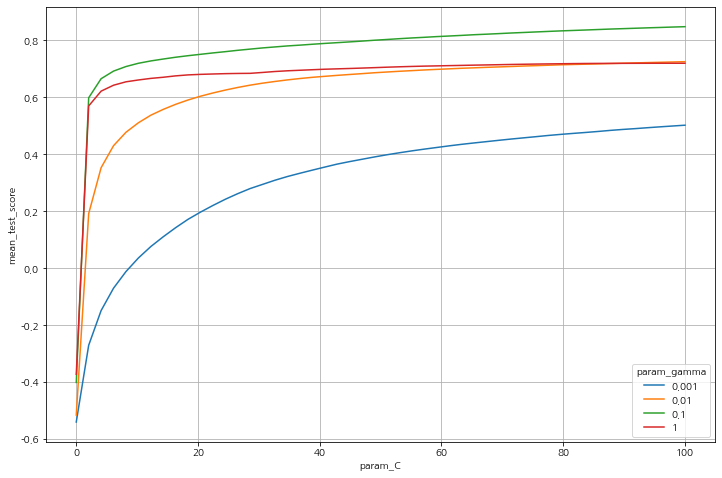

In [94]:
plt.figure(figsize = (12,8))
sns.lineplot(x = 'param_C', y = 'mean_test_score', data = temp1, hue = 'param_gamma')
plt.grid()
plt.show()

In [95]:
params11 = {'C' : np.linspace(89, 1000, 100), 'gamma':[0.1,1]}
params11

{'C': array([  89.        ,   98.2020202 ,  107.4040404 ,  116.60606061,
         125.80808081,  135.01010101,  144.21212121,  153.41414141,
         162.61616162,  171.81818182,  181.02020202,  190.22222222,
         199.42424242,  208.62626263,  217.82828283,  227.03030303,
         236.23232323,  245.43434343,  254.63636364,  263.83838384,
         273.04040404,  282.24242424,  291.44444444,  300.64646465,
         309.84848485,  319.05050505,  328.25252525,  337.45454545,
         346.65656566,  355.85858586,  365.06060606,  374.26262626,
         383.46464646,  392.66666667,  401.86868687,  411.07070707,
         420.27272727,  429.47474747,  438.67676768,  447.87878788,
         457.08080808,  466.28282828,  475.48484848,  484.68686869,
         493.88888889,  503.09090909,  512.29292929,  521.49494949,
         530.6969697 ,  539.8989899 ,  549.1010101 ,  558.3030303 ,
         567.50505051,  576.70707071,  585.90909091,  595.11111111,
         604.31313131,  613.51515152,  622.

In [96]:
m1_3 = SVR()
svm_m1_3 = GridSearchCV(m1_3, params11, cv=5)

In [97]:
svm_m1_3.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': array([  89.        ,   98.2020202 ,  107.4040404 ,  116.60606061,
        125.80808081,  135.01010101,  144.21212121,  153.41414141,
        162.61616162,  171.81818182,  181.02020202,  190.22222222,
        199.42424242,  208.62626263,  217.82828283,  227.03030303,
        236.23232323,  245.43434343,  254.63636364,  263.83838384,
        273.04040404,  282.24242424,  291.44444444,  300.64...
        751.54545455,  760.74747475,  769.94949495,  779.15151515,
        788.35353535,  797.55555556,  806.75757576,  815.95959596,
        825.16161616,  834.36363636,  843.56565657,  852.76767677,
        861.96969697,  871.17171717,  880.37373737,  889.57575758,
        898.77777778,  907.97979798,  917.18181818,  926.38383838,
        935.58585859,  944.78787879,  953.98989899,  963.19191919,
        972.39393939,  981.5959596 ,  990.7979798 , 1000.        ]),
                         'gamma': [0.1, 1]})

In [98]:
# 최적의 파라미터
svm_m1_2.best_params_

{'C': 100.0, 'gamma': 0.1}

In [99]:
# 그때의 성능
svm_m1_2.best_score_

0.8481020416710272

In [139]:
p1_3 = svm_m1_3.predict(x_val_s)
print('RMSE : ',mean_squared_error(y_val, p1_3, squared = False))
print('MAE : ',mean_absolute_error(y_val, p1_3))
print('MAPE : ',mean_absolute_percentage_error(y_val, p1_3))
print('1-MAPE : ',1-mean_absolute_percentage_error(y_val, p1_3))
print('r2_score : ',r2_score(y_val, p1_3))

RMSE :  2.8674491411048835
MAE :  2.1477337857612158
MAPE :  0.09226153470833628
1-MAPE :  0.9077384652916637
r2_score :  0.13358645133581304


In [101]:
result12 = pd.DataFrame(svm_m1_2.cv_results_)
temp2 = result12.loc[:, ['param_C','param_gamma','mean_test_score']]
temp2['param_gamma'] = temp2['param_gamma'].astype('str')
temp2.head()

,param_C,param_gamma,mean_test_score
0,0.01,0.001,-0.541683
1,0.01,0.01,-0.517234
2,0.01,0.1,-0.402465
3,0.01,1,-0.373828
4,2.050612,0.001,-0.271835


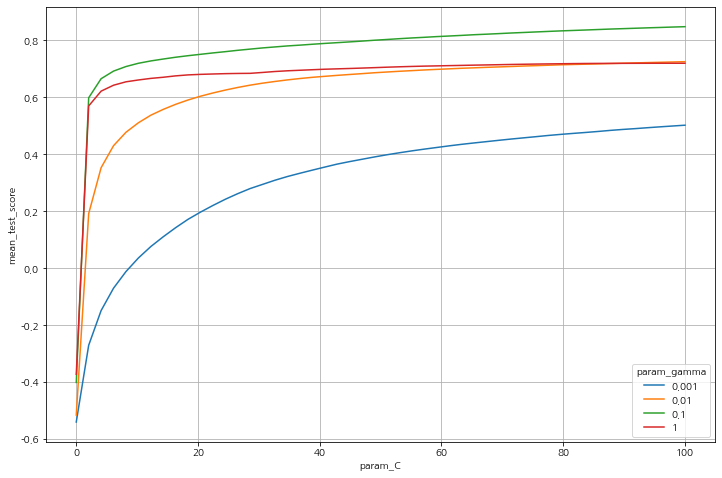

In [102]:
plt.figure(figsize = (12,8))
sns.lineplot(x = 'param_C', y = 'mean_test_score', data = temp1, hue = 'param_gamma')
plt.grid()
plt.show()

#### 2) Random Forest

In [103]:
params = {'max_depth' : range(2,21)}
params

{'max_depth': range(2, 21)}

In [104]:
m2 = RandomForestRegressor()
rf_m2 = GridSearchCV(m2, params, cv=5)

In [105]:
rf_m2.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(2, 21)})

In [106]:
# 최적의 파라미터
rf_m2.best_params_

{'max_depth': 8}

In [107]:
# 그때의 성능
rf_m2.best_score_

0.8301145112682657

In [108]:
p2_t = rf_m2.predict(x_test)
print('RMSE : ', mean_squared_error(y_test, p2_t, squared=False))
print('MAE  : ', mean_absolute_error(y_test, p2_t))
print('MAPE : ', mean_absolute_percentage_error(y_test, p2_t))
print('1-MAPE : ',1-mean_absolute_percentage_error(y_test, p2_t))
print('r2_score : ',r2_score(y_test, p2_t))

RMSE :  6.758643632207476
MAE  :  4.094997981669803
MAPE :  0.12572074287596496
1-MAPE :  0.874279257124035
r2_score :  0.9178399895865696


In [110]:
result = pd.DataFrame(rf_m2.cv_results_)

In [111]:
temp = result.loc[:, ['param_max_depth','mean_test_score']]
temp.head()

,param_max_depth,mean_test_score
0,2,0.140197
1,3,0.646216
2,4,0.788422
3,5,0.823848
4,6,0.829025


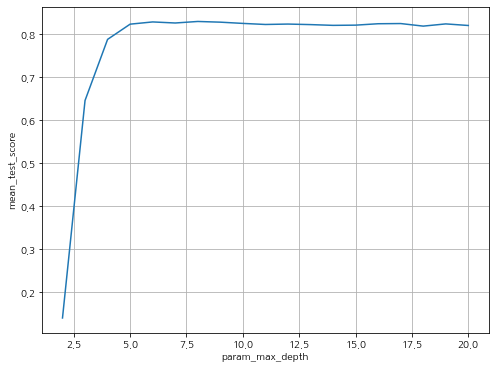

In [112]:
plt.figure(figsize = (8,6))
sns.lineplot(x = 'param_max_depth', y = 'mean_test_score', data = temp)
plt.grid()
plt.show()

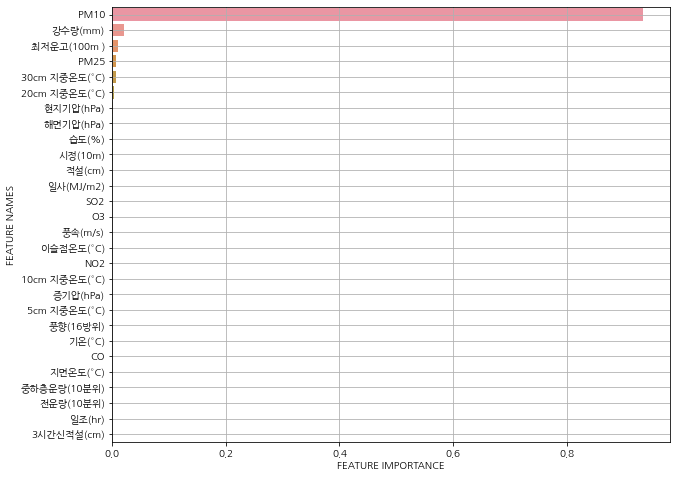

In [138]:
r2 = plot_feature_importance(rf_m2.best_estimator_.feature_importances_, list(x_train))

- 변수중요도는 PM10이 가장 높다. PM10 값들로 target을 채웠으니까 당연한 것이라고 생각한다.  
- 그러면 PM10을 빼야되나 생각했지만, 그렇다고 해서 다음으로 중요한 강수량 변수는 중요도가 그렇게 높지가 않아서 정확도가 많이 떨어질 것이라고 생각함. 그래서 PM10은 필요한 변수라고 생각함.
- PM10이 PM25와 상관관계가 가장 높아서 변수중요도도 PM25가 높을줄 알았지만 아니었다.

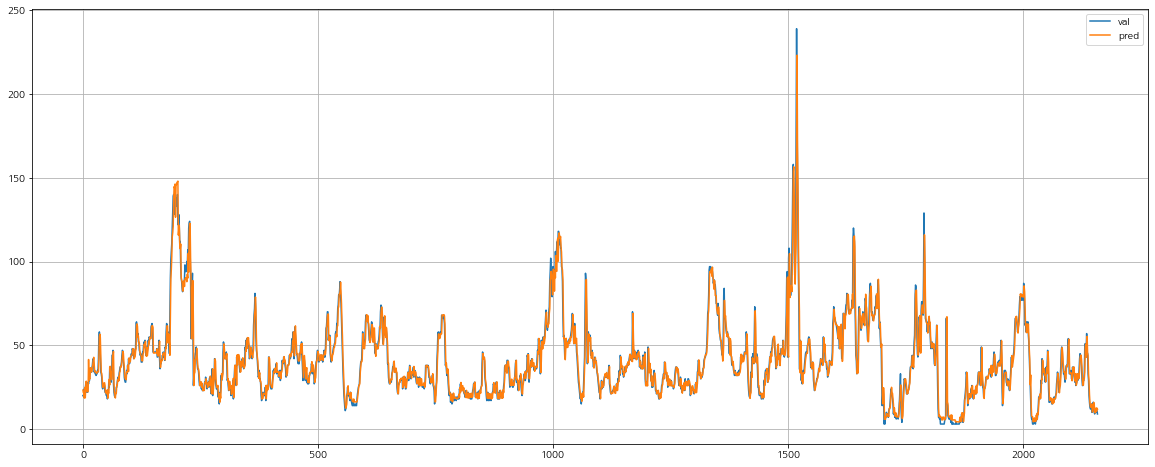

In [114]:
plt.figure(figsize = (20,8))
plt.plot(y_test, label = 'val')
plt.plot(p2_t, label = 'pred')

plt.legend()
plt.grid()
plt.show()

- r2 score가 0.92로 높게 나와서 그래프도 test 값과 예측값이 거의 겹쳐지게 나왔다.

#### 3) XGB

In [115]:
params = {'learning_rate' : np.linspace(0.01,0.2, 20), 'n_estimators':range(60,200,20), 'max_depth':[3,4,5,6]}
params

{'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
        0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ]),
 'n_estimators': range(60, 200, 20),
 'max_depth': [3, 4, 5, 6]}

In [116]:
m3 = XGBRegressor(objective = 'reg:squarederror')

# Random Search 설정.
xgb_m3 = GridSearchCV(m3, params, cv=5)

In [117]:
xgb_m3.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                              

In [118]:
# 최적의 파라미터
xgb_m3.best_params_

{'learning_rate': 0.08, 'max_depth': 3, 'n_estimators': 100}

In [119]:
# 그때의 성능
xgb_m3.best_score_

0.8253894095787647

In [120]:
p3_t = xgb_m3.predict(x_test)
print('RMSE : ', mean_squared_error(y_test, p3_t, squared=False))
print('MAE  : ', mean_absolute_error(y_test, p3_t))
print('MAPE : ', mean_absolute_percentage_error(y_test, p3_t))
print('1-MAPE : ',1-mean_absolute_percentage_error(y_test, p3_t))
print('r2_score : ',r2_score(y_test, p3_t))

RMSE :  6.648653783464092
MAE  :  4.0339186892789956
MAPE :  0.12581232650932636
1-MAPE :  0.8741876734906736
r2_score :  0.9204923664965716


In [122]:
# 변수 중요도 그래프 그리기 함수
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

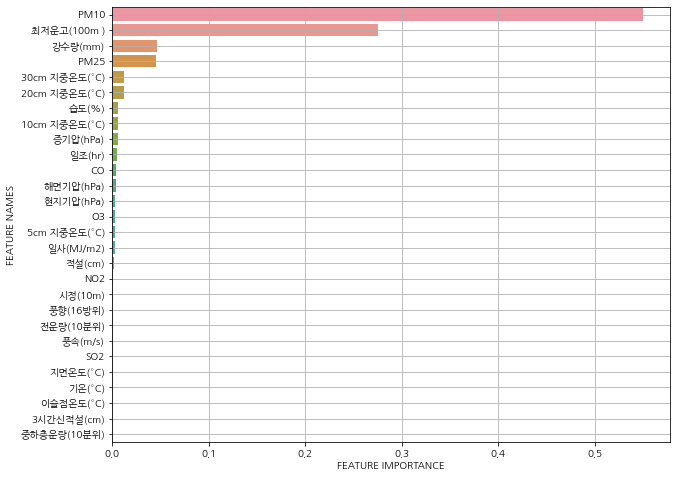

In [123]:
r3 = plot_feature_importance(xgb_m3.best_estimator_.feature_importances_, list(x_train))

- 마찬가지로 PM10의 변수중요도가 가장 높게 나왔다. (위와 같은 생각)
- 다음으로 높은 변수는 최저운고였다.
- 최저운고와 PM10의 상관계수도 0.03로 낮은데, 변수중요도가 왜 높게 나왔을까

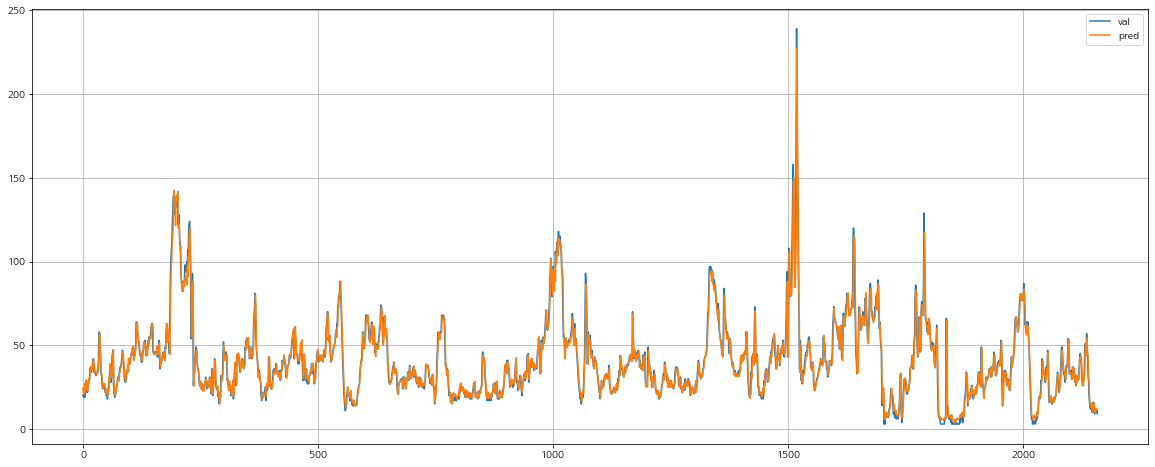

In [128]:
plt.figure(figsize = (20,8))
plt.plot(y_test, label = 'val')
plt.plot(p3_t, label = 'pred')

plt.legend()
plt.grid()
plt.show()

- r2 score가 0.92로 높게 나왔기 때문에 그래프도 test 값과 예측값이 거의 겹쳐지게 나왔다.

In [129]:
p3_t

array([24.46253  , 21.819101 , 22.38715  , ..., 11.3822365, 11.492856 ,
       11.617805 ], dtype=float32)

#### 4) LinearRegression

In [130]:
m4 = LinearRegression()
m4.fit(x_train, y_train)

LinearRegression()

In [131]:
p4_t = m4.predict(x_test)
print('RMSE : ',mean_squared_error(y_test, p4_t, squared = False))
print('MAE : ',mean_absolute_error(y_test, p4_t))
print('MAPE : ',mean_absolute_percentage_error(y_test, p4_t))
print('1-MAPE : ',1-mean_absolute_percentage_error(y_test, p4_t))
print('r2_score : ',r2_score(y_test, p4_t))

RMSE :  6.6686846636635835
MAE :  4.042101644061932
MAPE :  0.11892658696742392
1-MAPE :  0.8810734130325761
r2_score :  0.920012568024254


In [132]:
p4_t

array([22.32889647, 19.55796963, 20.00357684, ...,  9.82140137,
       10.75160143, 10.05832436])

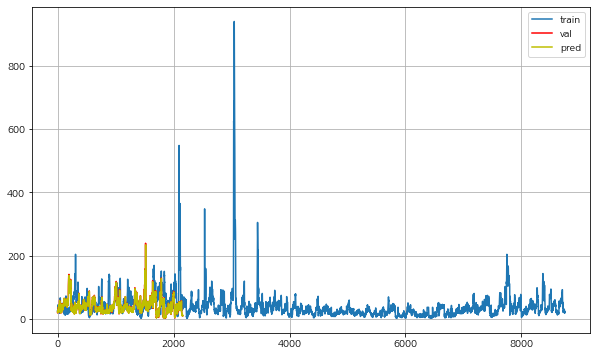

In [133]:
plt.figure(figsize = (10,6))
plt.plot(y_train, label = 'train')
plt.plot(y_test, label = 'val', color='r')
plt.plot(p4_t, label = 'pred', color='y')

plt.legend()
plt.grid()
plt.show()

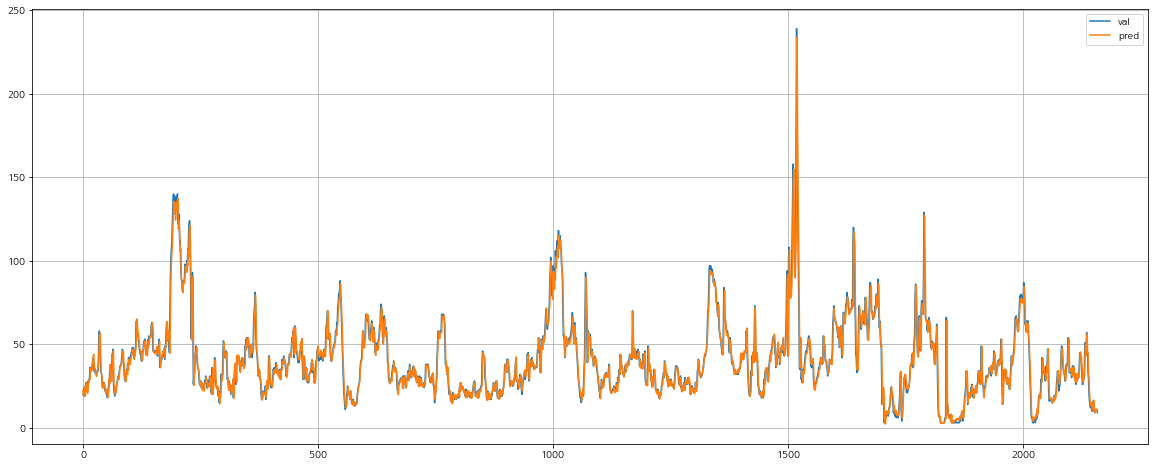

In [134]:
plt.figure(figsize = (20,8))
plt.plot(y_test, label = 'val')
plt.plot(p4_t, label = 'pred')

plt.legend()
plt.grid()
plt.show()

- r2 score 0.92

---